## Import Libraries

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

## Import Dataset:  *Heart_Attack_Prediction_dataset.csv*

In [2]:
HA_dataframe_raw = pd.read_csv("heart_attack_prediction_dataset.csv")
plt.show()
print(HA_dataframe_raw.head(20))

   Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0     BMW7812   67    Male          208         158/88          72         0   
1     CZE1114   21    Male          389         165/93          98         1   
2     BNI9906   21  Female          324         174/99          72         1   
3     JLN3497   84    Male          383        163/100          73         1   
4     GFO8847   66    Male          318          91/88          93         1   
5     ZOO7941   54  Female          297         172/86          48         1   
6     WYV0966   90    Male          358         102/73          84         0   
7     XXM0972   84    Male          220         131/68         107         0   
8     XCQ5937   20    Male          145        144/105          68         1   
9     FTJ5456   43  Female          248         160/70          55         0   
10    HSD6283   73  Female          373         107/69          97         1   
11    YSP0073   71    Male          374 

# Data Cleansing


To further clean this dataset, the following columns were added:                                                                -*"Systolic"* and *"diastolic"* which seperated the two BP values to avoid the values being read as a fraction or equation. 

The following columns were then added which look at their respective existing attribute and calculates if they have levels that are conisdered **Normal** or **High** rage.

-*"Cholesterol Level"*
-*"Triglycerides Level"*
-*"Systolic Level"*
-*"Diastolic Level"* 
-*"BP Level"*

Once it was determined if an indivuidal had high or normal levels of each factor,the percentage of indivuidals who were at risk for heart attach AND had high levels of each factor was calculated. These percentages were then graphed.

In [3]:
#### 
HA_dataframe_add = HA_dataframe_raw.copy()  

# Split the 'Blood Pressure' column into two new columns
HA_dataframe_add[['Systolic', 'Diastolic']] = HA_dataframe_add['Blood Pressure'].str.split('/', expand=True)

# Convert the columns to numeric values 
HA_dataframe_add['Systolic'] = pd.to_numeric(HA_dataframe_add['Systolic'])
HA_dataframe_add['Diastolic'] = pd.to_numeric(HA_dataframe_add['Diastolic'])

## Add columns for systeolic and diastolic levels 
HA_dataframe_add['Systolic Level'] = ['High' if Systolic > 130 else 'Normal' for Systolic in HA_dataframe_add['Systolic']]

HA_dataframe_add['Diastolic Level'] = ['High' if Diastolic > 80 else 'Normal' for Diastolic in HA_dataframe_add['Diastolic']]


# determine BP Level based on systolic and diastolic values
def determine_bp_level(row):
    if row['Systolic Level'] == 'High' and row['Diastolic Level'] == 'High':
        return 'High'
    elif row['Systolic Level'] == 'Normal' and row['Diastolic Level'] == 'High':
        return 'High'
    elif row['Systolic Level'] == 'High' and row['Diastolic Level'] == 'Normal':
        return 'High'
    else:
        return 'Normal'

# Create the 'BP Level' column by applying the above function to each row
HA_dataframe_add['BP Level'] = HA_dataframe_add.apply(determine_bp_level, axis=1)


## Create columns for Triglyceride Level
HA_dataframe_add['Triglycerides Level'] = ['High' if Triglycerides > 200 else 'Normal' for Triglycerides in HA_dataframe_add['Triglycerides']]
print(HA_dataframe_add.head(20))

## Create columns for Cholesterol Level 
HA_dataframe_add['Cholesterol Level'] = ['High' if Cholesterol > 200 else 'Normal' for Cholesterol in HA_dataframe_add['Cholesterol']]



   Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0     BMW7812   67    Male          208         158/88          72         0   
1     CZE1114   21    Male          389         165/93          98         1   
2     BNI9906   21  Female          324         174/99          72         1   
3     JLN3497   84    Male          383        163/100          73         1   
4     GFO8847   66    Male          318          91/88          93         1   
5     ZOO7941   54  Female          297         172/86          48         1   
6     WYV0966   90    Male          358         102/73          84         0   
7     XXM0972   84    Male          220         131/68         107         0   
8     XCQ5937   20    Male          145        144/105          68         1   
9     FTJ5456   43  Female          248         160/70          55         0   
10    HSD6283   73  Female          373         107/69          97         1   
11    YSP0073   71    Male          374 

Percentage of individuals with heart attack risk and High Blood Pressure: 82.06%
Percentage of individuals with heart attack risk and High Triglycerides: 77.89%
Percentage of individuals with heart attack risk and High Cholesterol: 72.48%


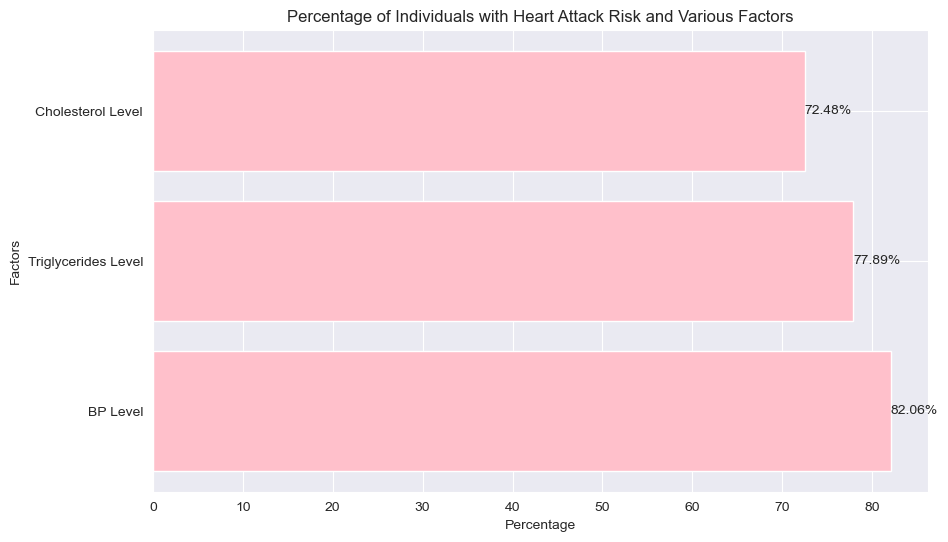

In [6]:


# Filter the heart attack data further to include only individuals with High BP (BP Level == "High")
heart_attack_BP = heart_attack_risk_yes[heart_attack_risk_yes['BP Level'] == 'High']

# Calculate the percentage of individuals with heart attack and Obesity
percentage_with_heart_attack_risk_and_HBP = (len(heart_attack_BP) / len(heart_attack_risk_yes)) * 100


# Filter the heart attack data further to include only individuals with High Triglycerides (TRG Level == "High")
heart_attack_TRG = heart_attack_risk_yes[heart_attack_risk_yes['Triglycerides Level'] == 'High']

# Calculate the percentage of individuals with heart attack and High Triglycerides
percentage_with_heart_attack_risk_and_HTRG = (len(heart_attack_TRG) / len(heart_attack_risk_yes)) * 100


# Filter the heart attack data further to include only individuals with High Cholesterol (CH Level == "High")
heart_attack_CH = heart_attack_risk_yes[heart_attack_risk_yes['Cholesterol Level'] == 'High']

# Calculate the percentage of individuals with heart attack and High Triglycerides
percentage_with_heart_attack_risk_and_HCH = (len(heart_attack_CH) / len(heart_attack_risk_yes)) * 100


print(f"Percentage of individuals with heart attack risk and High Blood Pressure: {percentage_with_heart_attack_risk_and_HBP:.2f}%")
print(f"Percentage of individuals with heart attack risk and High Triglycerides: {percentage_with_heart_attack_risk_and_HTRG:.2f}%")
print(f"Percentage of individuals with heart attack risk and High Cholesterol: {percentage_with_heart_attack_risk_and_HCH:.2f}%")

# Percentages data
percentages = [
    percentage_with_heart_attack_risk_and_HBP,
    percentage_with_heart_attack_risk_and_HTRG,
    percentage_with_heart_attack_risk_and_HCH,
]


# Categories
categories = ['BP Level', 'Triglycerides Level', 'Cholesterol Level']

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.barh(categories, percentages, color='pink')
plt.title('Percentage of Individuals with Heart Attack Risk and Various Factors')
plt.xlabel('Percentage')
plt.ylabel('Factors')
for index, value in enumerate(percentages):
    plt.text(value, index, f'{value:.2f}%', va='center')

# Show the plot
plt.show()


Below I calculated the percentage of indivulas who are at risk of heart attack + one other factor to attempt to see which indivuidal specific factors have the bigest impact on having a heart attack:

Percentage of individuals with heart attack risk and alcohol consumption: 58.90%
Percentage of individuals with heart attack risk and medication use: 49.98%
Percentage of individuals with heart attack risk and PHP: 49.60%
Percentage of individuals with heart attack risk and smoker: 89.52%
Percentage of individuals with heart attack risk and Obesity: 49.25%
Percentage of individuals with heart attack risk and diabetes: 66.33%


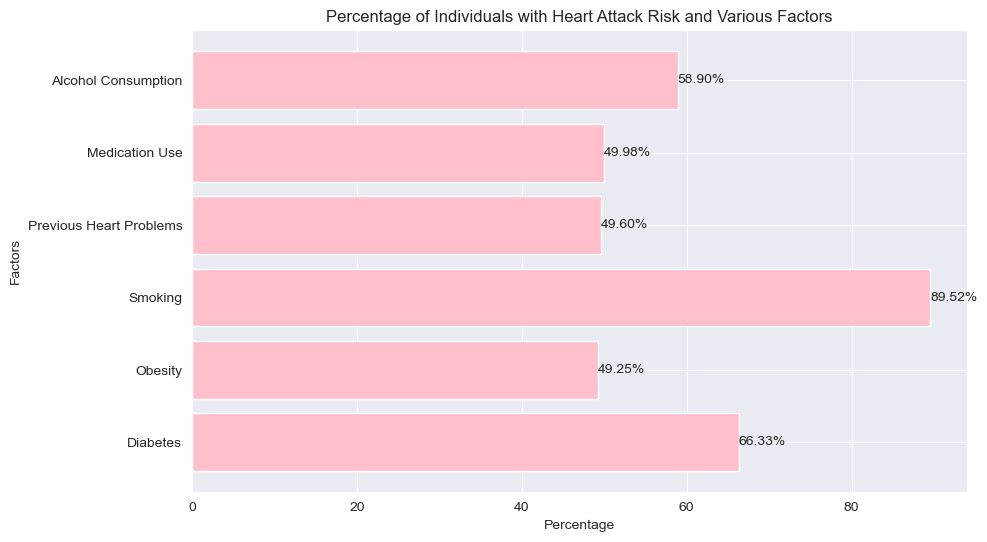

In [5]:
heart_attack_risk_yes = HA_dataframe_add[HA_dataframe_add['Heart Attack Risk'] == 1]

##Diabetes
# Filter the heart attack data further to include only individuals with diabetes (diabetes == 1)
heart_attack_diabetes = heart_attack_risk_yes[heart_attack_risk_yes['Diabetes'] == 1]

# Calculate the percentage of individuals with heart attack and diabetes
percentage_with_heart_attack_risk_and_diabetes = (len(heart_attack_diabetes) / len(heart_attack_risk_yes)) * 100


##Obesity
# Filter the heart attack data further to include only individuals with Obesity (Obesity == 1)
heart_attack_obesity = heart_attack_risk_yes[heart_attack_risk_yes['Obesity'] == 1]

# Calculate the percentage of individuals with heart attack and Obesity
percentage_with_heart_attack_risk_and_obesity = (len(heart_attack_obesity) / len(heart_attack_risk_yes)) * 100


##Smoker
# Filter the heart attack data further to include only individuals who Smoke (Smoking == 1)
heart_attack_smoker = heart_attack_risk_yes[heart_attack_risk_yes['Smoking'] == 1]

# Calculate the percentage of individuals with heart attack and Smoking
percentage_with_heart_attack_risk_and_smoker = (len(heart_attack_smoker) / len(heart_attack_risk_yes)) * 100


##Heart Problems
# Filter the heart attack data further to include only individuals with Previous Heart Problems (Previous Heart Problems == 1)
heart_attack_PHP = heart_attack_risk_yes[heart_attack_risk_yes['Previous Heart Problems'] == 1]

# Calculate the percentage of individuals with heart attack and Previous Heart Problems
percentage_with_heart_attack_risk_and_PHP = (len(heart_attack_PHP) / len(heart_attack_risk_yes)) * 100


##Medication Use
# Filter the heart attack data further to include only individuals with Medication Use (Medication Use == 1)
heart_attack_medication = heart_attack_risk_yes[heart_attack_risk_yes['Medication Use'] == 1]

# Calculate the percentage of individuals with heart attack and Medication Use
percentage_with_heart_attack_risk_and_medication  = (len(heart_attack_medication) / len(heart_attack_risk_yes)) * 100


##Alcohol Consumption
# Filter the heart attack data further to include only individuals with Alcohol Consumption (Alcohol Consumption == 1)
heart_attack_alcohol = heart_attack_risk_yes[heart_attack_risk_yes['Alcohol Consumption'] == 1]

# Calculate the percentage of individuals with heart attack and Alcohol Consumption
percentage_with_heart_attack_risk_and_alcohol  = (len(heart_attack_alcohol) / len(heart_attack_risk_yes)) * 100


print(f"Percentage of individuals with heart attack risk and alcohol consumption: {percentage_with_heart_attack_risk_and_alcohol:.2f}%")
print(f"Percentage of individuals with heart attack risk and medication use: {percentage_with_heart_attack_risk_and_medication:.2f}%")
print(f"Percentage of individuals with heart attack risk and PHP: {percentage_with_heart_attack_risk_and_PHP:.2f}%")
print(f"Percentage of individuals with heart attack risk and smoker: {percentage_with_heart_attack_risk_and_smoker:.2f}%")
print(f"Percentage of individuals with heart attack risk and Obesity: {percentage_with_heart_attack_risk_and_obesity:.2f}%")
print(f"Percentage of individuals with heart attack risk and diabetes: {percentage_with_heart_attack_risk_and_diabetes:.2f}%")


# Percentages data
percentages = [
    percentage_with_heart_attack_risk_and_diabetes,
    percentage_with_heart_attack_risk_and_obesity,
    percentage_with_heart_attack_risk_and_smoker,
    percentage_with_heart_attack_risk_and_PHP,
    percentage_with_heart_attack_risk_and_medication,
    percentage_with_heart_attack_risk_and_alcohol
]

# Categories
categories = ['Diabetes', 'Obesity', 'Smoking', 'Previous Heart Problems', 'Medication Use', 'Alcohol Consumption']

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.barh(categories, percentages, color='pink')
plt.title('Percentage of Individuals with Heart Attack Risk and Various Factors')
plt.xlabel('Percentage')
plt.ylabel('Factors')


for index, value in enumerate(percentages):
    plt.text(value, index, f'{value:.2f}%', va='center')

# Show the plot
plt.show()


Below I found the percetnage of indivulas who are at risk for a heart attack and their diet type. Found that there is no obvious correlation between diet and heart attack risk.

Percentage of individuals with heart attack and Average diet: 32.69%
Percentage of individuals with heart attack and Healthy diet: 34.37%
Percentage of individuals with heart attack and Unhealthy diet: 32.94%


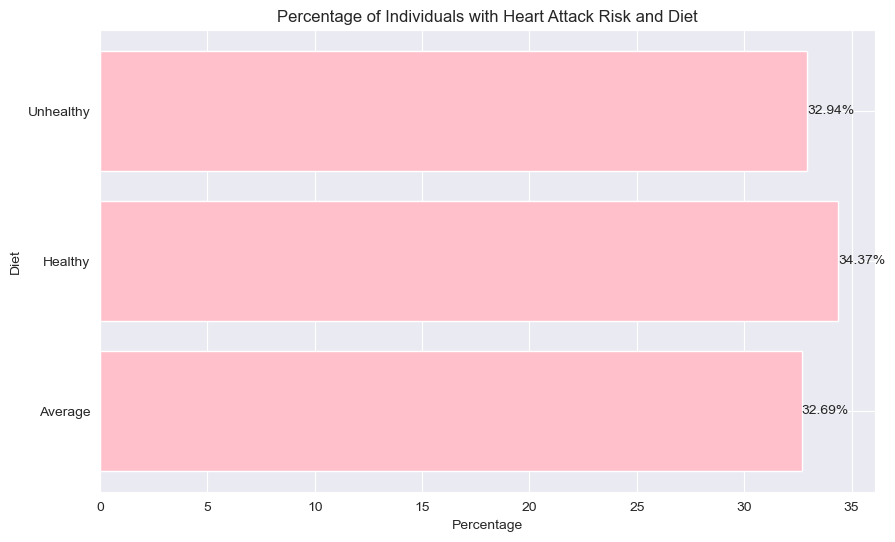

In [7]:
heart_attack_risk_yes = HA_dataframe_add[HA_dataframe_add['Heart Attack Risk'] == 1]

# Filter the heart attack data further to include only individuals with Average diet (Diet == Average)
heart_attack_adiet = heart_attack_risk_yes[heart_attack_risk_yes['Diet'] == 'Average']

# Calculate the percentage of individuals with heart attack and diabetes
percentage_with_heart_attack_and_adiet  = (len(heart_attack_adiet) / len(heart_attack_risk_yes)) * 100



# Filter the heart attack data further to include only individuals with diabetes (Diet == Healthy)
heart_attack_hdiet = heart_attack_risk_yes[heart_attack_risk_yes['Diet'] == 'Healthy']

# Calculate the percentage of individuals with heart attack and diabetes
percentage_with_heart_attack_and_hdiet  = (len(heart_attack_hdiet) / len(heart_attack_risk_yes)) * 100



# Filter the heart attack data further to include only individuals with diabetes (Diet == Unhealthy)
heart_attack_udiet = heart_attack_risk_yes[heart_attack_risk_yes['Diet'] == 'Unhealthy']

# Calculate the percentage of individuals with heart attack and diabetes
percentage_with_heart_attack_and_udiet  = (len(heart_attack_udiet) / len(heart_attack_risk_yes)) * 100

print(f"Percentage of individuals with heart attack and Average diet: {percentage_with_heart_attack_and_adiet:.2f}%")
print(f"Percentage of individuals with heart attack and Healthy diet: {percentage_with_heart_attack_and_hdiet:.2f}%")
print(f"Percentage of individuals with heart attack and Unhealthy diet: {percentage_with_heart_attack_and_udiet:.2f}%")




# Percentages data
percentages = [
    percentage_with_heart_attack_and_adiet,
    percentage_with_heart_attack_and_hdiet,
    percentage_with_heart_attack_and_udiet,
]

# Categories
categories = ['Average', 'Healthy', 'Unhealthy']

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.barh(categories, percentages, color='pink')
plt.title('Percentage of Individuals with Heart Attack Risk and Diet')
plt.xlabel('Percentage')
plt.ylabel('Diet')


for index, value in enumerate(percentages):
    plt.text(value, index, f'{value:.2f}%', va='center')

# Show the plot
plt.show()


In [8]:
# Calculate the total number of individuals with heart attack risk
total_heart_attack_risk = len(heart_attack_risk_yes)

# Calculate the percentage of men with heart attack risk in each country
percentage_heart_attack_male_by_country = ((heart_attack_risk_yes[heart_attack_risk_yes['Sex'] == 'Male']
                                            .groupby(['Country'])
                                            .size() / total_heart_attack_risk) * 100).round(2)

# Calculate the percentage of women with heart attack risk in each country
percentage_heart_attack_female_by_country = ((heart_attack_risk_yes[heart_attack_risk_yes['Sex'] == 'Female']
                                              .groupby(['Country'])
                                              .size() / total_heart_attack_risk) * 100).round(2)

# Print the results
print("Percentage of Males with Heart Attack Risk in Each Country:")
print(percentage_heart_attack_male_by_country)

print("\nPercentage of Females with Heart Attack Risk in Each Country:")
print(percentage_heart_attack_female_by_country)

Percentage of Males with Heart Attack Risk in Each Country:
Country
Argentina         3.79
Australia         3.57
Brazil            3.76
Canada            3.44
China             3.41
Colombia          3.31
France            3.12
Germany           3.89
India             3.15
Italy             3.03
Japan             3.50
New Zealand       3.73
Nigeria           4.01
South Africa      3.31
South Korea       3.63
Spain             3.19
Thailand          3.60
United Kingdom    3.41
United States     3.70
Vietnam           3.38
dtype: float64

Percentage of Females with Heart Attack Risk in Each Country:
Country
Argentina         1.75
Australia         1.78
Brazil            1.43
Canada            1.59
China             1.53
Colombia          1.85
France            1.88
Germany           1.59
India             0.96
Italy             1.31
Japan             1.08
New Zealand       1.08
Nigeria           1.66
South Africa      1.27
South Korea       1.56
Spain             1.59
Thailand          

## Country Level Analysis 

Country Level data was analyzed to show how the dataset is distributed by country and then to show how many men and women are at risk for heart attack in each country. 

Percentage of Males with Heart Attack Risk: 69.93%
Percentage of Females with Heart Attack Risk: 30.07%


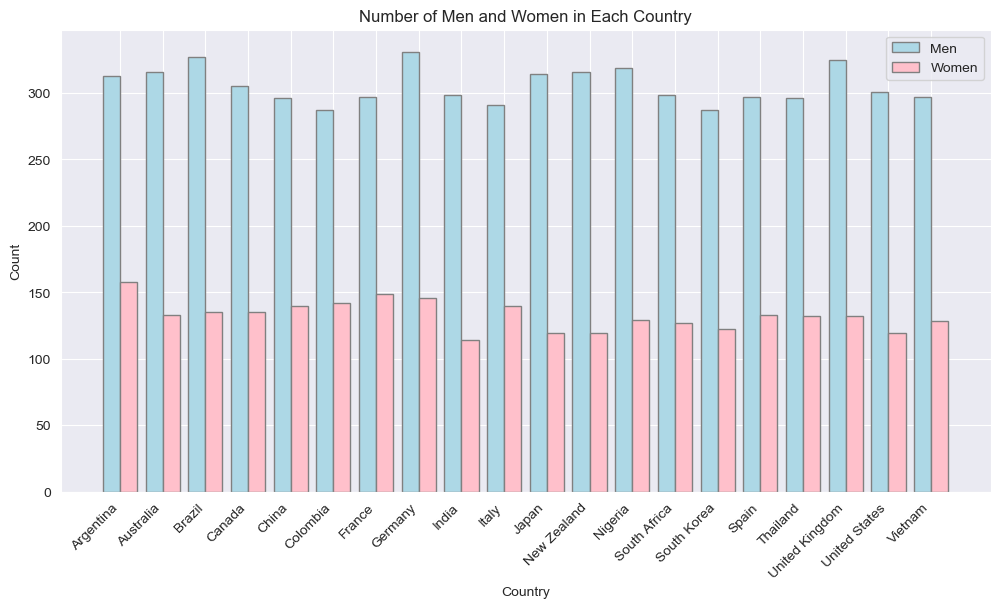

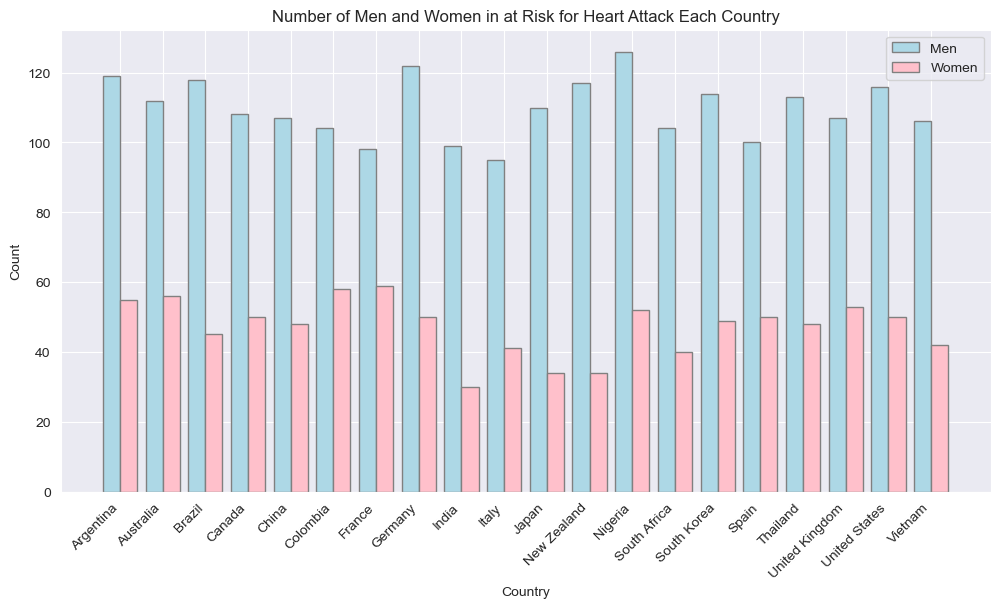

In [9]:

# Filter the heart attack data further to include only individuals with diabetes (Diet == Unhealthy)
heart_attack_male = heart_attack_risk_yes[heart_attack_risk_yes['Sex'] == 'Male']

# Calculate the percentage of individuals with heart attack and diabetes
percentage_with_heart_attack_and_male  = (len(heart_attack_male) / len(heart_attack_risk_yes)) * 100

# Filter the heart attack data further to include only individuals with diabetes (Diet == Unhealthy)
heart_attack_female = heart_attack_risk_yes[heart_attack_risk_yes['Sex'] == 'Female']

# Calculate the percentage of individuals with heart attack and diabetes
percentage_with_heart_attack_and_female  = (len(heart_attack_female) / len(heart_attack_risk_yes)) * 100

print(f"Percentage of Males with Heart Attack Risk: {percentage_with_heart_attack_and_male:.2f}%")
print(f"Percentage of Females with Heart Attack Risk: {percentage_with_heart_attack_and_female:.2f}%")

##bar chart for number of men and women in each country 
men_counts = HA_dataframe_add[HA_dataframe_add['Sex'] == 'Male'].groupby(['Country']).size()
women_counts = HA_dataframe_add[HA_dataframe_add['Sex'] == 'Female'].groupby(['Country']).size()

# Create a bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.4

# Position of bars on X-axis
r1 = range(len(men_counts))
r2 = [x + bar_width for x in r1]

# Create bars for men and women
plt.bar(r1, men_counts, color='lightblue', width=bar_width, edgecolor='grey', label='Men')
plt.bar(r2, women_counts, color='pink', width=bar_width, edgecolor='grey', label='Women')
plt.title('Number of Men and Women in Each Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks([r + bar_width/2 for r in range(len(men_counts))], men_counts.index, rotation=45, ha='right')
plt.legend()
plt.show()

##bar chart for number of men and women in each country at risk for heart attack 
men_counts = HA_dataframe_add[(HA_dataframe_add['Sex'] == 'Male') & (HA_dataframe_add['Heart Attack Risk'] == 1)].groupby(['Country']).size()
women_counts = HA_dataframe_add[(HA_dataframe_add['Sex'] == 'Female') & (HA_dataframe_add['Heart Attack Risk'] == 1)].groupby(['Country']).size()

# Create a bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.4

# Position of bars on X-axis
r1 = range(len(men_counts))
r2 = [x + bar_width for x in r1]

# Create bars for men and women
plt.bar(r1, men_counts, color='lightblue', width=bar_width, edgecolor='grey', label='Men')
plt.bar(r2, women_counts, color='pink', width=bar_width, edgecolor='grey', label='Women')
plt.title('Number of Men and Women in at Risk for Heart Attack Each Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks([r + bar_width/2 for r in range(len(men_counts))], men_counts.index, rotation=45, ha='right')
plt.legend()
plt.show()


In [10]:
heart_attack_age = HA_dataframe_add[HA_dataframe_add['Heart Attack Risk'] == 1]

# Group the filtered data by 'country' and 'Sex' and calculate the mean age
mean_age_by_country_sex = heart_attack_age.groupby(['Country', 'Sex'])['Age'].mean().round()

# Display the resulting Series
print(mean_age_by_country_sex)

Country         Sex   
Argentina       Female    55.0
                Male      53.0
Australia       Female    52.0
                Male      55.0
Brazil          Female    48.0
                Male      51.0
Canada          Female    50.0
                Male      57.0
China           Female    58.0
                Male      52.0
Colombia        Female    50.0
                Male      53.0
France          Female    52.0
                Male      54.0
Germany         Female    54.0
                Male      49.0
India           Female    52.0
                Male      56.0
Italy           Female    54.0
                Male      56.0
Japan           Female    50.0
                Male      53.0
New Zealand     Female    52.0
                Male      57.0
Nigeria         Female    53.0
                Male      55.0
South Africa    Female    50.0
                Male      58.0
South Korea     Female    52.0
                Male      58.0
Spain           Female    53.0
                

In [11]:
heart_attack_BP = HA_dataframe_add[HA_dataframe_add['Heart Attack Risk'] == 1]

# Group the filtered data by 'country' and 'Sex' and calculate the mean age
mean_BP_Country = heart_attack_BP.groupby(['Country', 'Sex'])['Systolic','Diastolic'].mean().round()

# Display the resulting Series
print(mean_BP_Country)


heart_attack_BP = HA_dataframe_add[HA_dataframe_add['Heart Attack Risk'] == 0]

# Group the filtered data by 'country' and 'Sex' and calculate the mean age
mean_BP_Country_nonHA = heart_attack_BP.groupby(['Country', 'Sex'])['Systolic','Diastolic'].mean().round()

# Display the resulting Series
print(mean_BP_Country_nonHA)


                       Systolic  Diastolic
Country        Sex                        
Argentina      Female     137.0       86.0
               Male       134.0       87.0
Australia      Female     139.0       85.0
               Male       137.0       86.0
Brazil         Female     137.0       83.0
               Male       136.0       85.0
Canada         Female     133.0       86.0
               Male       135.0       84.0
China          Female     132.0       88.0
               Male       136.0       83.0
Colombia       Female     138.0       86.0
               Male       138.0       86.0
France         Female     138.0       83.0
               Male       136.0       85.0
Germany        Female     140.0       87.0
               Male       133.0       85.0
India          Female     135.0       88.0
               Male       136.0       85.0
Italy          Female     138.0       81.0
               Male       137.0       87.0
Japan          Female     131.0       85.0
           

C:\Users\JStro\AppData\Local\Temp\ipykernel_27864\3057390791.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_BP_Country = heart_attack_BP.groupby(['Country', 'Sex'])['Systolic','Diastolic'].mean().round()
C:\Users\JStro\AppData\Local\Temp\ipykernel_27864\3057390791.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_BP_Country_nonHA = heart_attack_BP.groupby(['Country', 'Sex'])['Systolic','Diastolic'].mean().round()


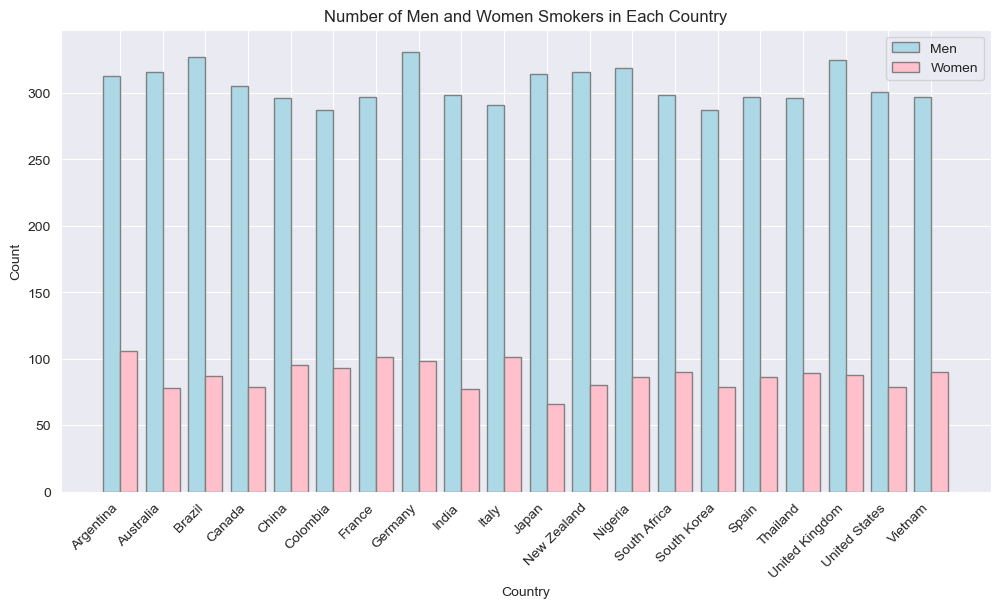

In [12]:

men_counts = HA_dataframe_add[(HA_dataframe_add['Sex'] == 'Male') & (HA_dataframe_add['Smoking'] == 1)].groupby(['Country']).size()
women_counts = HA_dataframe_add[(HA_dataframe_add['Sex'] == 'Female') & (HA_dataframe_add['Smoking'] == 1)].groupby(['Country']).size()

# Create a bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.4

# Position of bars on X-axis
r1 = range(len(men_counts))
r2 = [x + bar_width for x in r1]

# Create bars for men and women
plt.bar(r1, men_counts, color='lightblue', width=bar_width, edgecolor='grey', label='Men')
plt.bar(r2, women_counts, color='pink', width=bar_width, edgecolor='grey', label='Women')
plt.title('Number of Men and Women Smokers in Each Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks([r + bar_width/2 for r in range(len(men_counts))], men_counts.index, rotation=45, ha='right')
plt.legend()
plt.show()




Percentage of Men who are smokers: 77.76%
Percentage of Women who are smokers: 22.24%
Percentage of Men who are smokers and at risk for Heart Attack: 78.11%
Percentage of Women who are smokers and at risk for Heart Attack: 21.89%


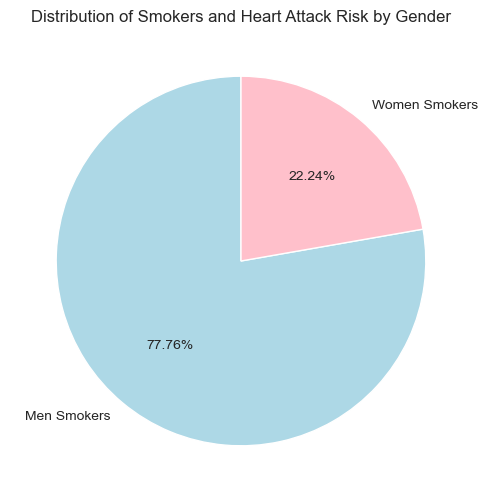

In [13]:
heart_attack_risk_yes = HA_dataframe_add[HA_dataframe_add['Heart Attack Risk'] == 1]
heart_attack_smoker_yes = HA_dataframe_add[HA_dataframe_add['Smoking'] == 1]
heart_attack_smoker_risk_yes = heart_attack_risk_yes[heart_attack_risk_yes['Smoking'] == 1]



# Filter the heart attack data further to include only men who smoke 
heart_attack_male_smoker = heart_attack_smoker_yes[heart_attack_smoker_yes['Sex'] == 'Male']
# Filter the heart attack data further to include only women who smoke 
heart_attack_female_smoker = heart_attack_smoker_yes[heart_attack_smoker_yes['Sex'] == 'Female']


# Filter the heart attack data further to include only men who smoke and are at risk for Heart Attack 
heart_attack_male_risk_smoker = heart_attack_smoker_risk_yes[heart_attack_smoker_risk_yes['Sex'] == 'Male']
# Filter the heart attack data further to include only women who smoke and are at risk for Heart Attack 
heart_attack_female_risk_smoker = heart_attack_smoker_risk_yes[heart_attack_smoker_risk_yes['Sex'] == 'Female']

# Calculate the percentage of men who are smokers
percentage_of_male_smoker  = (len(heart_attack_male_smoker) / len(heart_attack_smoker_yes)) * 100

# Calculate the percentage of women who are smokers
percentage_of_female_smoker  = (len(heart_attack_female_smoker) / len(heart_attack_smoker_yes)) * 100

# Calculate the percentage of men with heart attack and are smoker
percentage_of_male_smoker_risk  = (len(heart_attack_male_risk_smoker) / len(heart_attack_smoker_risk_yes)) * 100

# Calculate the percentage of women with heart attack and are smoker
percentage_of_female_smoker_risk  = (len(heart_attack_female_risk_smoker) / len(heart_attack_smoker_risk_yes)) * 100

print(f"Percentage of Men who are smokers: {percentage_of_male_smoker:.2f}%")
print(f"Percentage of Women who are smokers: {percentage_of_female_smoker:.2f}%")

print(f"Percentage of Men who are smokers and at risk for Heart Attack: {percentage_of_male_smoker_risk:.2f}%")
print(f"Percentage of Women who are smokers and at risk for Heart Attack: {percentage_of_female_smoker_risk:.2f}%")



# Plot pie charts
labels = ['Men Smokers', 'Women Smokers']
sizes = [percentage_of_male_smoker, percentage_of_female_smoker]
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90, colors=['lightblue', 'pink'])
plt.title('Distribution of Smokers and Heart Attack Risk by Gender')
plt.show()







When looking at the number of men and women who are smokers and also at risk for a heart attack we found that there were 0 men meaning that ALL men who are smokers are at risk for a heart attack. Upon further research I found that ALL men in the study are smokers, so any analysis on the effects of smoking and heart attacks needs to be done looking at females only in this study 


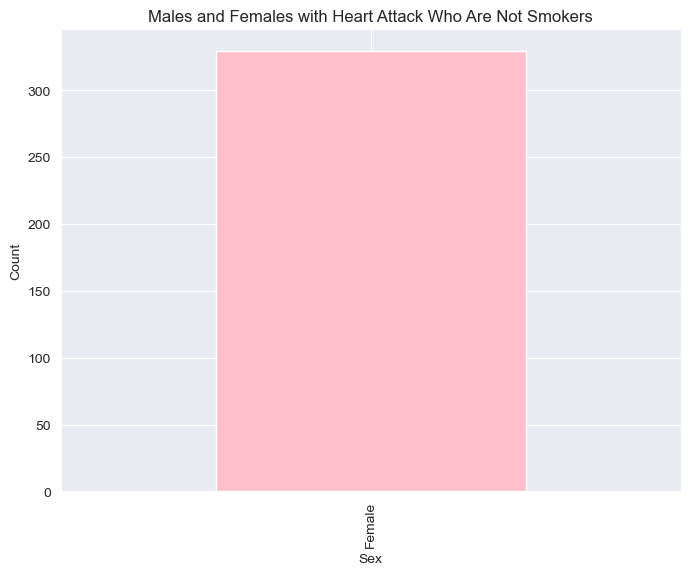

In [14]:
heart_attack_non_smokers = HA_dataframe_add[(HA_dataframe_add['Heart Attack Risk'] == 1) & (HA_dataframe_add['Smoking'] == 0)]

# Group the data by 'Sex' and count the occurrences
gender_counts = heart_attack_non_smokers['Sex'].value_counts()

# Create a bar chart
gender_counts.plot(kind='bar', figsize=(8, 6), color=['pink', 'blue'])

# Set plot title and labels
plt.title('Males and Females with Heart Attack Who Are Not Smokers')
plt.xlabel('Sex')
plt.ylabel('Count')

# Show the plot
plt.show()


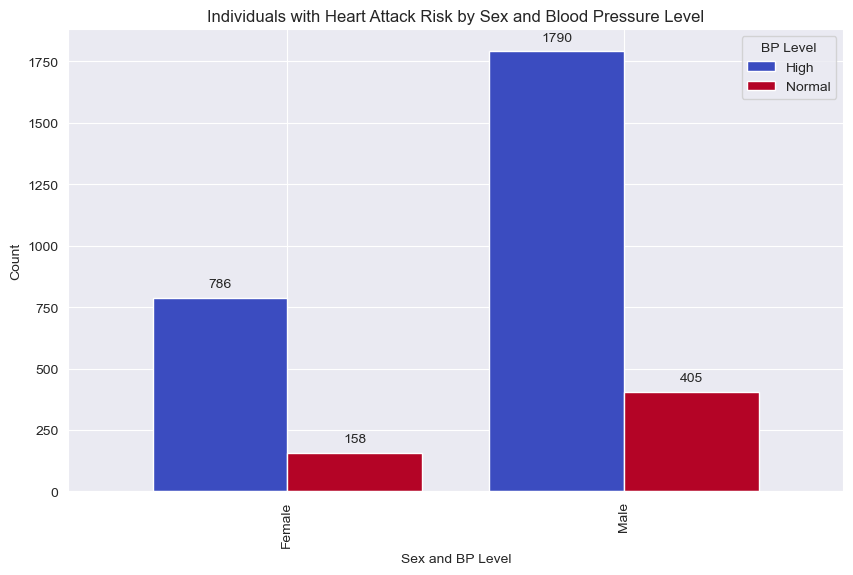

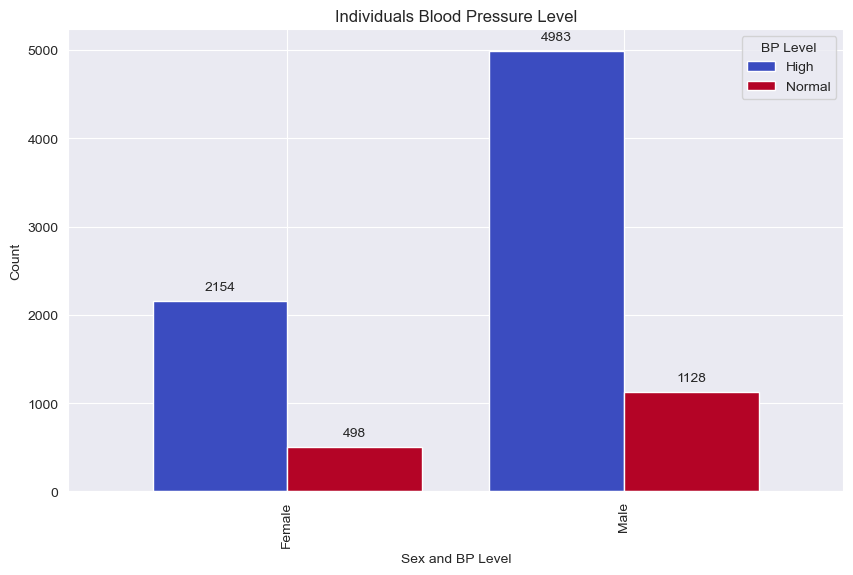

In [15]:
heart_attack_data = HA_dataframe_add[HA_dataframe_add['Heart Attack Risk'] == 1]

# Group the data by 'sex' and 'BP Level' and count the occurrences
heart_attack_distribution = heart_attack_data.groupby(['Sex', 'BP Level']).size().unstack(fill_value=0)


HABP = heart_attack_distribution.plot(kind='bar', figsize=(10, 6), width=0.8, colormap='coolwarm')
plt.title('Individuals with Heart Attack Risk by Sex and Blood Pressure Level')
plt.xlabel('Sex and BP Level')
plt.ylabel('Count')
for p in HABP.patches:
    HABP.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')



plt.show()




# Group the data by 'sex' and 'BP Level' and count the occurrences
heart_attack_distribution = HA_dataframe_add.groupby(['Sex', 'BP Level']).size().unstack(fill_value=0)


NHABP = heart_attack_distribution.plot(kind='bar', figsize=(10, 6), width=0.8, colormap='coolwarm')
plt.title('Individuals Blood Pressure Level')
plt.xlabel('Sex and BP Level')
plt.ylabel('Count')
for p in NHABP.patches:
    NHABP.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')



plt.show()

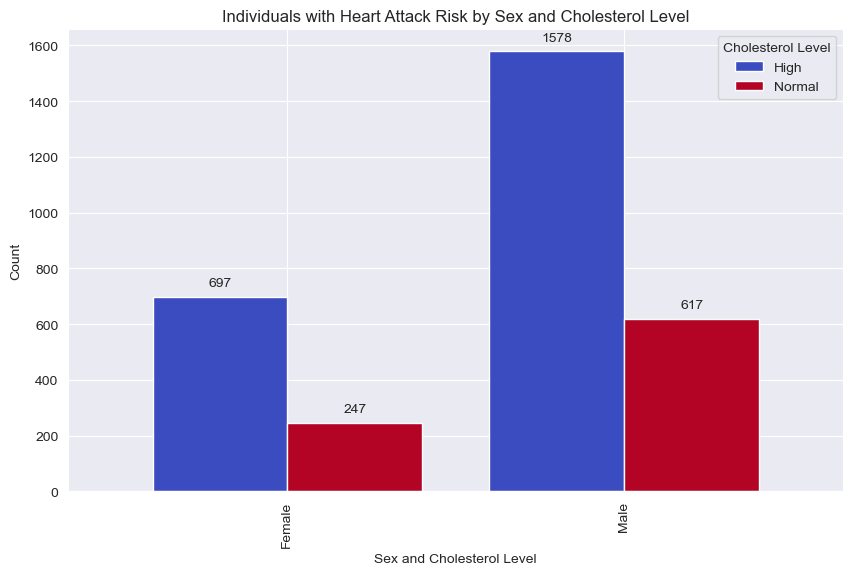

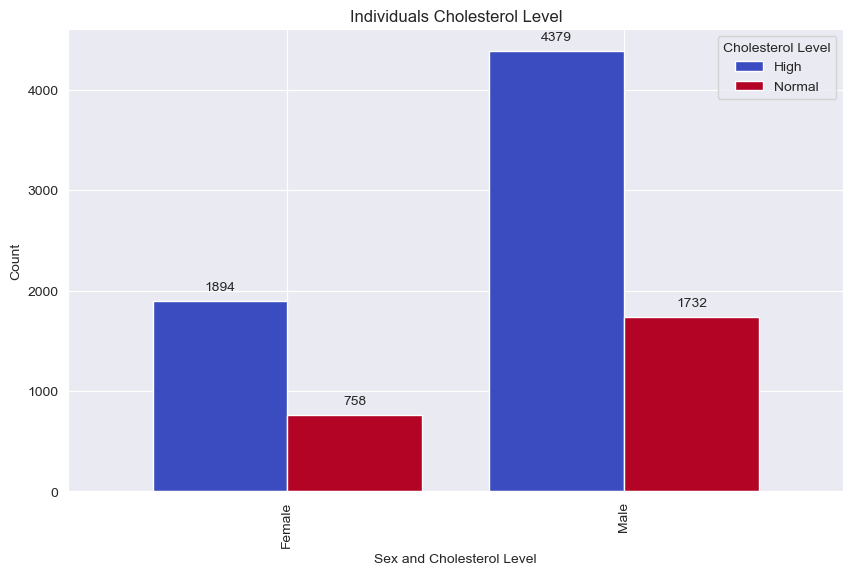

In [16]:
heart_attack_data = HA_dataframe_add[HA_dataframe_add['Heart Attack Risk'] == 1]

# Group the data by 'sex' and 'BP Level' and count the occurrences
heart_attack_distribution = heart_attack_data.groupby(['Sex', 'Cholesterol Level']).size().unstack(fill_value=0)


HABP = heart_attack_distribution.plot(kind='bar', figsize=(10, 6), width=0.8, colormap='coolwarm')
plt.title('Individuals with Heart Attack Risk by Sex and Cholesterol Level')
plt.xlabel('Sex and Cholesterol Level')
plt.ylabel('Count')
for p in HABP.patches:
    HABP.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')



plt.show()




# Group the data by 'sex' and 'BP Level' and count the occurrences
heart_attack_distribution = HA_dataframe_add.groupby(['Sex', 'Cholesterol Level']).size().unstack(fill_value=0)


NHABP = heart_attack_distribution.plot(kind='bar', figsize=(10, 6), width=0.8, colormap='coolwarm')
plt.title('Individuals Cholesterol Level')
plt.xlabel('Sex and Cholesterol Level')
plt.ylabel('Count')
for p in NHABP.patches:
    NHABP.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')



plt.show()

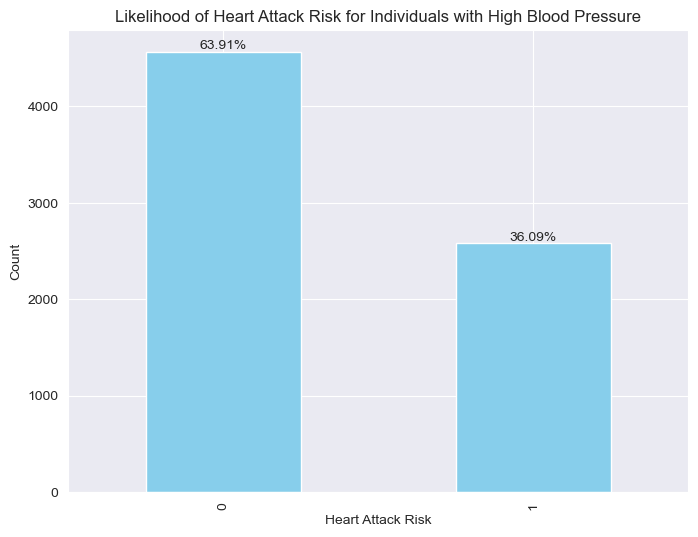

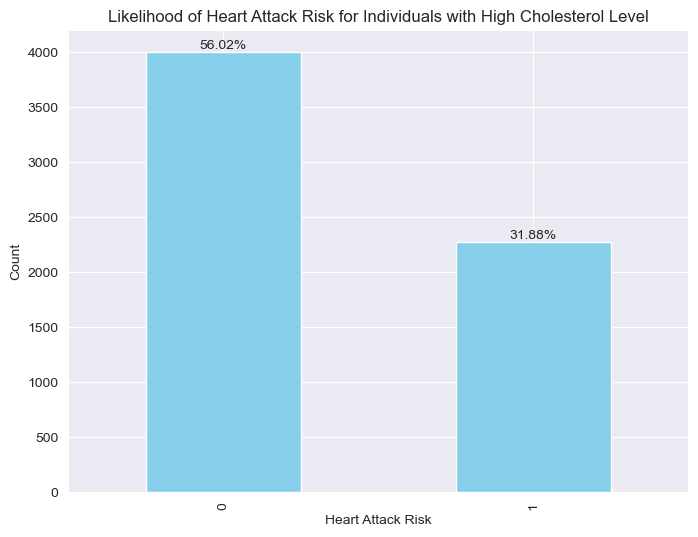

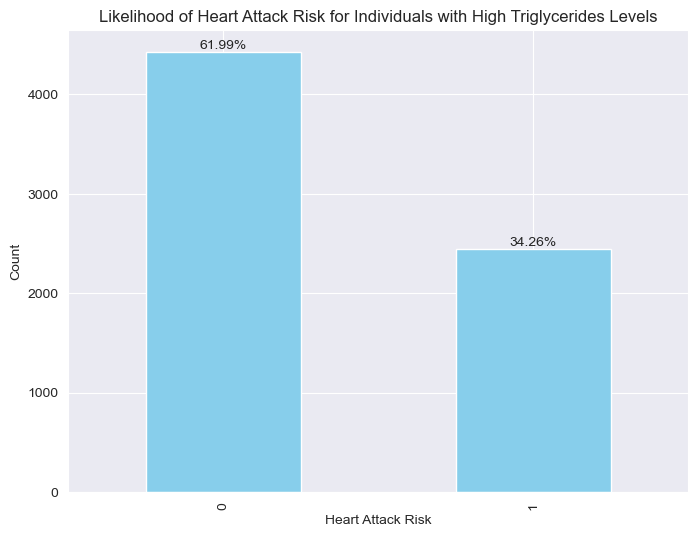

In [17]:
high_bp_data = HA_dataframe_add[HA_dataframe_add['BP Level'] == 'High']

# Group the data by 'Heart Attack Risk' and count the occurrences
heart_attack_distribution = high_bp_data.groupby('Heart Attack Risk').size()

# Plot the data
heart_attack_distribution.plot(kind='bar', figsize=(8, 6), color='skyblue')

# Annotate the bars with percentages
total_high_bp = len(high_bp_data)
for i, count in enumerate(heart_attack_distribution):
    percentage = f'{(count / total_high_bp) * 100:.2f}%'
    plt.text(i, count + 0.1, percentage, ha='center', va='bottom')

# Set plot title and labels
plt.title('Likelihood of Heart Attack Risk for Individuals with High Blood Pressure')
plt.xlabel('Heart Attack Risk')
plt.ylabel('Count')

# Show the plot
plt.show()


high_ch_data = HA_dataframe_add[HA_dataframe_add['Cholesterol Level'] == 'High']

# Group the data by 'Heart Attack Risk' and count the occurrences
heart_attack_distribution = high_ch_data.groupby('Heart Attack Risk').size()

# Plot the data
heart_attack_distribution.plot(kind='bar', figsize=(8, 6), color='skyblue')

# Annotate the bars with percentages
total_high_ch = len(high_bp_data)
for i, count in enumerate(heart_attack_distribution):
    percentage = f'{(count / total_high_ch) * 100:.2f}%'
    plt.text(i, count + 0.1, percentage, ha='center', va='bottom')

# Set plot title and labels
plt.title('Likelihood of Heart Attack Risk for Individuals with High Cholesterol Level')
plt.xlabel('Heart Attack Risk')
plt.ylabel('Count')

# Show the plot
plt.show()

high_tr_data = HA_dataframe_add[HA_dataframe_add['Triglycerides Level'] == 'High']

# Group the data by 'Heart Attack Risk' and count the occurrences
heart_attack_distribution = high_tr_data.groupby('Heart Attack Risk').size()

# Plot the data
heart_attack_distribution.plot(kind='bar', figsize=(8, 6), color='skyblue')

# Annotate the bars with percentages
total_high_tr = len(high_bp_data)
for i, count in enumerate(heart_attack_distribution):
    percentage = f'{(count / total_high_tr) * 100:.2f}%'
    plt.text(i, count + 0.1, percentage, ha='center', va='bottom')

# Set plot title and labels
plt.title('Likelihood of Heart Attack Risk for Individuals with High Triglycerides Levels')
plt.xlabel('Heart Attack Risk')
plt.ylabel('Count')

# Show the plot
plt.show()

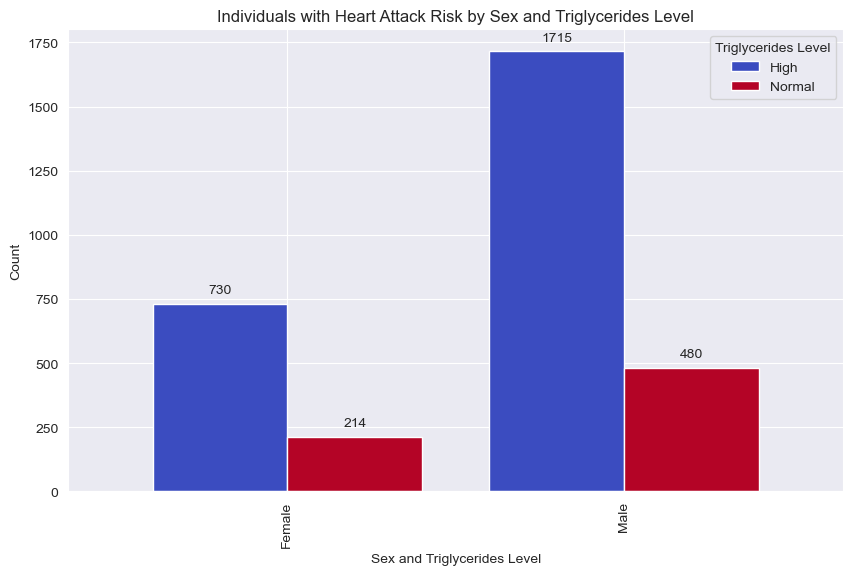

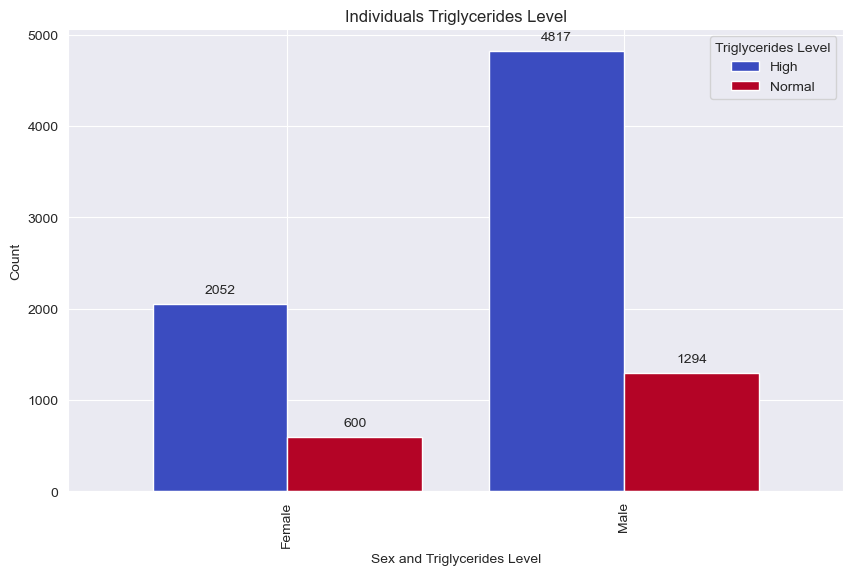

In [18]:
heart_attack_data = HA_dataframe_add[HA_dataframe_add['Heart Attack Risk'] == 1]

# Group the data by 'sex' and 'BP Level' and count the occurrences
heart_attack_distribution = heart_attack_data.groupby(['Sex', 'Triglycerides Level']).size().unstack(fill_value=0)


# Plot the data
HAT = heart_attack_distribution.plot(kind='bar', figsize=(10, 6), width=0.8, colormap='coolwarm')
plt.title('Individuals with Heart Attack Risk by Sex and Triglycerides Level')
plt.xlabel('Sex and Triglycerides Level')
plt.ylabel('Count')
# Annotate each bar with its count
for p in HAT.patches:
    HAT.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


# Group the data by 'sex' and 'BP Level' and count the occurrences
heart_attack_distribution = HA_dataframe_add.groupby(['Sex', 'Triglycerides Level']).size().unstack(fill_value=0)


NHAT = heart_attack_distribution.plot(kind='bar', figsize=(10, 6), width=0.8, colormap='coolwarm')
plt.title('Individuals Triglycerides Level')
plt.xlabel('Sex and Triglycerides Level')
plt.ylabel('Count')
for p in NHAT.patches:
    NHAT.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.show()

In [105]:
# Save the modified DataFrame to a new CSV file
HA_dataframe_add.to_csv('new_file.csv', index=False)
HA_dataframe_add.to_excel('output_excel_file2.xlsx', index=False)

## Insight
After analyzing this data I found that the dataset is pretty evenly split up among country and the number of individuals at risk for heart attack is evenly spread out, from this finding I can assume that this means that being at risk of a heart attack has more to do with biological factors rather than socioeconomic or geographic factors of the indivuidals.

Blood pressure, cholesterol, and triglyceride factors are the facotrs that are highly correlated to being at risk of a heart attack as there are over 80% of indivuidals at risk if heart attack who have high blood pressure and more than 70% of indivuidals who have high cholesterol and or triglyceride levels who are at risk of heart attack. 

There were certian attriibutes included in the dataset which were hard to decipher the relation to being at risk of heart attack. Smoking was the biggest one due to teh fact that all men in the dataset were listed as smokers and therefore an accurate analysis on teh relation to smoking and being at risk of heart attack could not be done with this dataset. 

Other factors where the data was evenly spread making it harder to decipher the relation to being at risk of heart attack were, income,medication use, stress level, sedentary hours per day, and country. 
